In [1]:
from TransformingCity import TransformingCity, LandUseViewer, PopulationViewer, RentViewer

import numpy as np
import matplotlib.pyplot as plt
import thinkplot
import scipy

%matplotlib inline
from matplotlib import rc
rc('animation', html='html5')

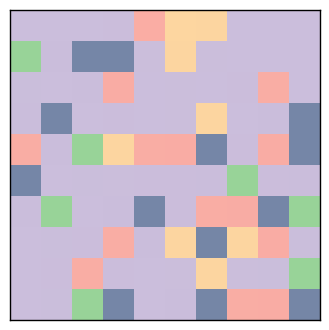

In [2]:
city = TransformingCity(10, random_seed = 17)
city.array = city.landuse # default array is landuse
viewer = LandUseViewer(city)
anim = viewer.animate()

In [4]:
# anim

In [5]:
print(city.array)

[[1 1 1 1 3 2 2 1 1 1]
 [6 1 5 5 1 2 1 1 1 1]
 [1 1 1 3 1 1 1 1 3 1]
 [1 5 1 1 1 1 2 1 1 5]
 [3 1 6 2 3 3 5 1 3 5]
 [5 1 1 1 1 1 1 6 1 1]
 [1 6 1 1 5 1 3 3 5 6]
 [1 1 1 3 1 2 5 2 3 1]
 [1 1 3 1 1 1 2 1 1 6]
 [1 1 6 5 1 1 5 3 3 5]]


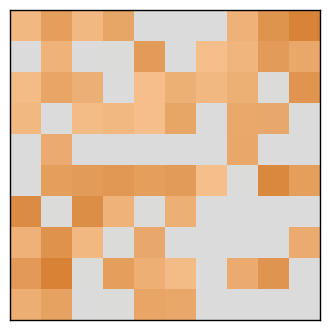

In [3]:
#city = TransformingCity(10)
city.step()
city.array = city.pop_count # default array is landuse
viewer = PopulationViewer(city)
anim = viewer.animate()

In [7]:
print(city.array)

[[ 11.  18.   0.   0.   0.  30.   0.  16.  17.   0.]
 [ 16.  18.   0.   0.  22.  22.   0.  14.   0.   0.]
 [ 21.  19.  15.   0.   0.  18.  13.  19.  14.  17.]
 [  0.   0.   0.   0.   0.  17.   0.   0.   0.  20.]
 [  0.  19.  22.   0.  16.  22.  15.  21.   0.   0.]
 [ 17.  23.   0.  17.  22.   0.  19.   0.  24.  17.]
 [  0.   0.  14.  12.   0.   0.   0.  25.   0.  23.]
 [ 18.  20.   0.   0.  21.  30.   0.  19.   0.  21.]
 [  0.  18.  20.   0.   0.   0.  18.   0.  21.   0.]
 [  0.  21.   0.  19.  16.  17.  11.   0.  25.   0.]]


In [8]:
 anim

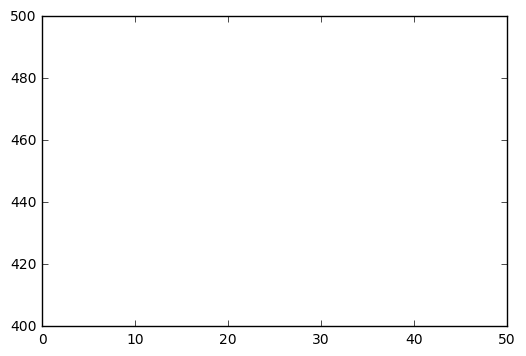

In [9]:
#The smaller the city, the more agents get displaced, because creative density is higher.
#the whole time.
city = TransformingCity(7)
for i in range(50):
    city.step()
    
plt.plot(city.displaced_history)
plt.ylim([400, 500])
plt.show()

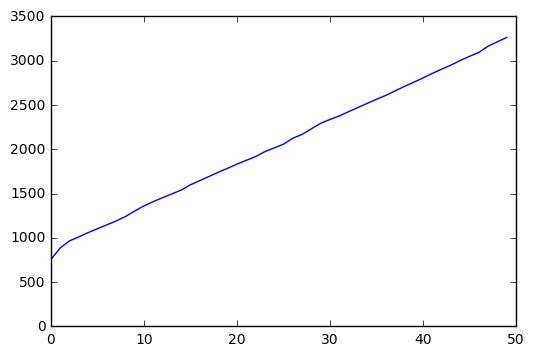

In [10]:
#A smaller city with new agents moving in means that...
#more agents get displaced, because creative density gets EVEN higher.
city = TransformingCity(7)
steps = 50
n_to_add_per_step = 50
for i in range(steps):
    city.step()
    city.add_agents(n_to_add_per_step)
    
plt.plot(city.displaced_history)
plt.ylim([0, 1000 + steps*n_to_add_per_step])
plt.show()

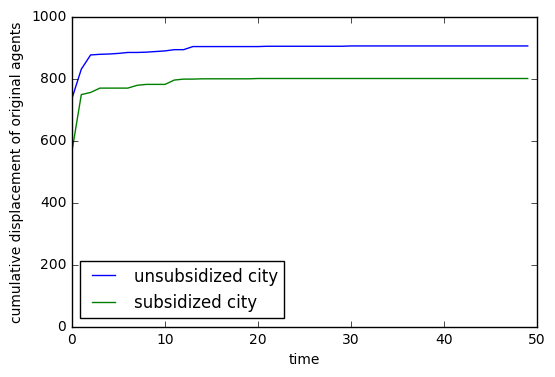

In [12]:
#The smaller the city, the more agents get displaced, because creative density is higher.
#the whole time.
city = TransformingCity(7, random_seed=55)
sub_city = TransformingCity(7, p_subsidized = 0.5, sub_housing_rate=0.5, random_seed=55)


for i in range(50):
    city.step()
    sub_city.step()
    
plt.plot(city.displaced_history, label='unsubsidized city')
plt.plot(sub_city.displaced_history, label='subsidized city')
plt.legend(loc='best')
plt.ylabel('cumulative displacement of original agents')
plt.xlabel('time')
plt.ylim([0, 1000])
plt.show()

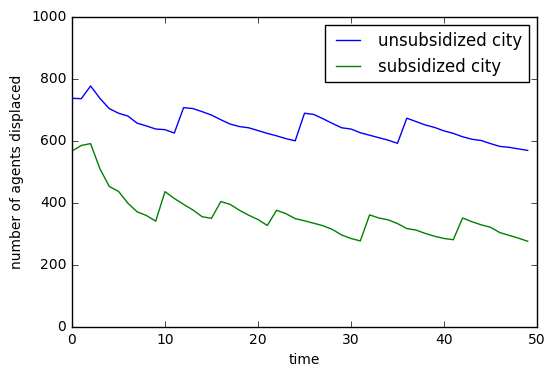

In [13]:
#The smaller the city, the more agents get displaced, because creative density is higher.
#the whole time.
city = TransformingCity(7, random_seed=55)
sub_city = TransformingCity(7, p_subsidized = 0.5, sub_housing_rate=0.5, random_seed=55)


for i in range(50):
    city.step()
    sub_city.step()
    
plt.plot(city.num_displaced_this_step_history, label='unsubsidized city')
plt.plot(sub_city.num_displaced_this_step_history, label='subsidized city')
plt.legend(loc='best')
plt.ylabel('number of agents displaced')
plt.xlabel('time')
plt.ylim([0, 1000])
plt.show()


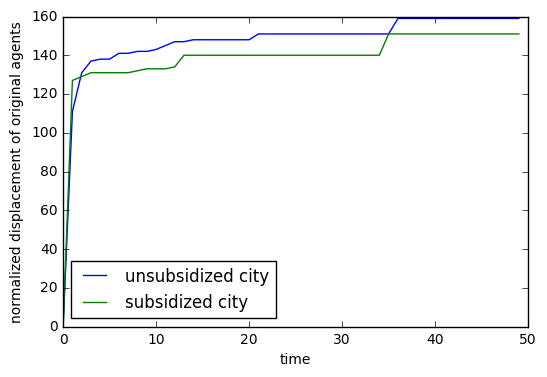

In [2]:
city = TransformingCity(7)
sub_city = TransformingCity(7, p_subsidized = .5)


for i in range(50):
    city.step()
    sub_city.step()
    
unsubnormalized = [x - city.displaced_history[0] for x in city.displaced_history]
subnormalized = [x - sub_city.displaced_history[0] for x in sub_city.displaced_history]
plt.plot(unsubnormalized, label='unsubsidized city')
plt.plot(subnormalized, label='subsidized city')
plt.legend(loc='best')
plt.ylabel('normalized displacement of original agents')
plt.xlabel('time')
# plt.ylim([0, 1000])
plt.show()

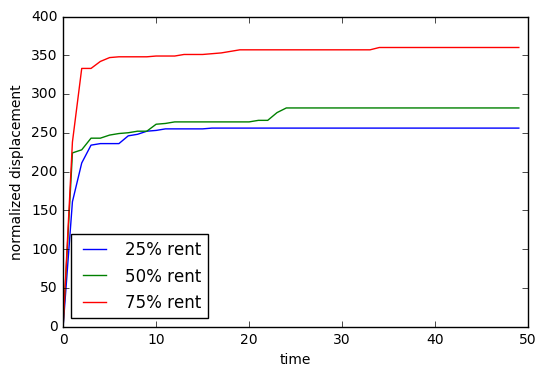

In [13]:
np.random.seed(40)
city_quarter = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.25)
city_half = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.5)
city_threequarter = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.75)

for i in range(50):
    city_quarter.step()
    city_half.step()
    city_threequarter.step()
    
quarter = [x - city_quarter.displaced_history[0] for x in city_quarter.displaced_history]
half = [x - city_half.displaced_history[0] for x in city_half.displaced_history]
threequarter = [x - city_threequarter.displaced_history[0] for x in city_threequarter.displaced_history]

plt.plot(quarter, label='25% rent')
plt.plot(half, label='50% rent')
plt.plot(threequarter, label='75% rent')
plt.legend(loc='best')
plt.ylabel('normalized displacement')
plt.xlabel('time')
plt.show()

In [14]:

def get_slopes(cities):


    for i in range(20):
        for city in cities:
            city.step()

    i = 0
    slopes = []
    for city in cities:
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(range(len(city.displaced_history)), city.displaced_history)
        slopes.append(slope)
        #print(slopes[i-1])
        i += 1
        
    return tuple(slopes)
    

In [15]:
#linear regression of a bunch of runs.
slopes1 = []
slopes2 = []
for i in range(100):
    city1 = TransformingCity(7)
    sub_city = TransformingCity(7, p_subsidized = .1)
    cities = [city1, sub_city]
    slope1, slope2 = get_slopes(cities)
    slopes1.append(slope1)
    slopes2.append(slope2)

In [16]:
print(np.mean(slopes1))
print(np.mean(slopes2))

4.03441353383
4.60058646617


In [17]:
%%time
slopes25 = []
slopes50 = []
slopes75 = []

for i in range(100):
    city_quarter = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.25)
    city_half = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.5)
    city_threequarter = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.75)
    
    cities = [city_quarter, city_half, city_threequarter]
    s25, s50, s75 = get_slopes(cities)
    slopes25.append(s25)
    slopes50.append(s50)
    slopes75.append(s75)
    

print('25%: {slope}'.format(slope=np.mean(slopes25)))
print('50%: {slope}'.format(slope=np.mean(slopes50)))
print('75%: {slope}'.format(slope=np.mean(slopes75)))


25%: 4.540270676691729
50%: 6.494451127819548
75%: 5.276413533834588


In [18]:
%%time

end_25 = []
end_50 = []
end_75 = []

for i in range(1000):
    city_quarter = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.25, random_seed=40)
    city_half = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.5, random_seed=40)
    city_threequarter = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.75, random_seed=40)
    
    for j in range(20):
        city_quarter.step()
        city_half.step()
        city_threequarter.step()
        
    end_25.append(city_quarter.displaced_history[-1])
    end_50.append(city_half.displaced_history[-1])
    end_75.append(city_threequarter.displaced_history[-1])
    

CPU times: user 19min 48s, sys: 12 s, total: 19min 59s
Wall time: 19min 50s


Number of displaced original residents after 20 time steps for 25%: 503.559
Number of displaced original residents after 20 time steps for 50%: 795.71
Number of displaced original residents after 20 time steps for 75%: 881.217


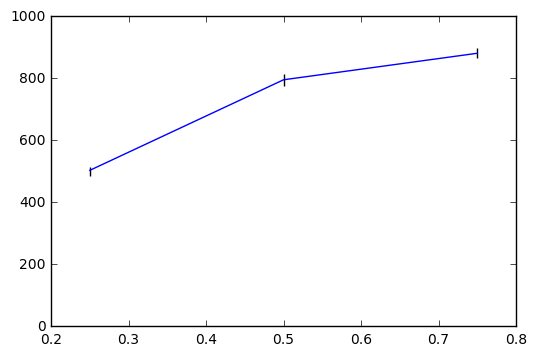

In [38]:
print('Number of displaced original residents after 20 time steps for 25%: {p20}'.format(p20=np.mean(end_25)))
print('Number of displaced original residents after 20 time steps for 50%: {p20}'.format(p20=np.mean(end_50)))
print('Number of displaced original residents after 20 time steps for 75%: {p20}'.format(p20=np.mean(end_75)))

sub_rates = [0.25, 0.5, 0.75]
means = [np.mean(end_25), np.mean(end_50), np.mean(end_75)]
mins = [np.percentile(end_25, 5), np.percentile(end_50, 5), np.percentile(end_75, 5)]
maxs = [np.percentile(end_25, 95), np.percentile(end_50, 95), np.percentile(end_75, 95)]
plt.plot(sub_rates, means)
plt.vlines(sub_rates, mins, maxs)
plt.ylim(0, 1000)
plt.show()

In [14]:
end_25_perstep = []
end_50_perstep = []
end_75_perstep = []

for i in range(1000):
    city_quarter = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.25, random_seed=40)
    city_half = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.5, random_seed=40)
    city_threequarter = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.75, random_seed=40)
    
    for j in range(20):
        city_quarter.step()
        city_half.step()
        city_threequarter.step()
        
    end_25_perstep.append(city_quarter.num_displaced_this_step_history[-1])
    end_50_perstep.append(city_half.num_displaced_this_step_history[-1])
    end_75_perstep.append(city_threequarter.num_displaced_this_step_history[-1])


ValueError: only 2 non-keyword arguments accepted

In [24]:
#stack the data, and save it to a file
resmat_perstep = np.stack([end_25_perstep, end_50_perstep, end_75_perstep], axis=0)
np.save('displaced_at_20th_timestep_25_50_75_sub_1000trials.npy', resmat_perstep)

Number of displaced original residents on the 20th time step for 25%: 77.344
Number of displaced original residents on the 20th time step for 50%: 215.208
Number of displaced original residents on the 20th time step for 75%: 451.067


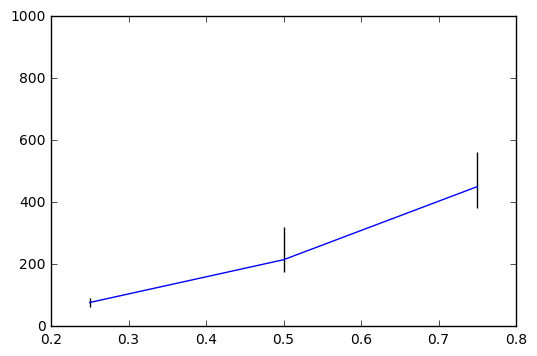

In [22]:
print('Number of displaced original residents on the 20th time step for 25%: {p20}'.format(p20=np.mean(end_25_perstep)))
print('Number of displaced original residents on the 20th time step for 50%: {p20}'.format(p20=np.mean(end_50_perstep)))
print('Number of displaced original residents on the 20th time step for 75%: {p20}'.format(p20=np.mean(end_75_perstep)))

sub_rates = [0.25, 0.5, 0.75]
means = np.mean(resmat_perstep, axis=1)
mins = [np.percentile(resmat_perstep, 5, axis=1)]
maxs = [np.percentile(resmat_perstep, 95, axis=1)]
plt.plot(sub_rates, means)
plt.vlines(sub_rates, mins, maxs)
plt.ylim(0, 1000)
plt.ylabel('Displaced agents')
plt.xlabel('Subsidisation')
plt.show()

In [23]:
print(np.mean(end_25)/city_quarter.start_pop)

NameError: name 'end_25' is not defined

change in % of creative space in unsubsidized city: -21.6 %
change in % of creative space in 50% subsidized city: -19.4 %


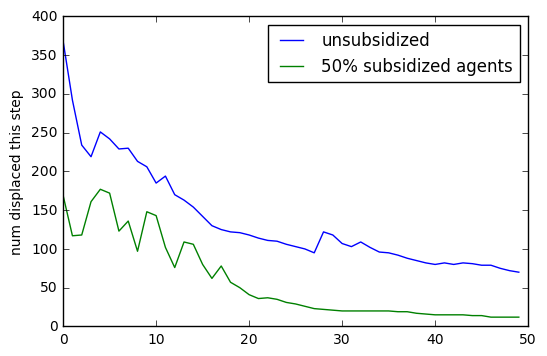

In [39]:
city = TransformingCity(10, avg_rent=10000)
sub_city = TransformingCity(10, avg_rent=10000, p_subsidized=0.5)

for i in range(50):
    city.step()
    sub_city.step()

print("change in % of creative space in unsubsidized city: {0:.1f} %".format(
        (city.p_creative_space_history[-1] - city.p_creative_space_history[0])*100))
print("change in % of creative space in 50% subsidized city: {0:.1f} %".format(
        (sub_city.p_creative_space_history[-1] - sub_city.p_creative_space_history[0])*100))
plt.hold('on')
plt.plot(city.num_displaced_this_step_history, label='unsubsidized')
plt.plot(sub_city.num_displaced_this_step_history, label='50% subsidized agents')
plt.ylabel('num displaced this step')
plt.legend(loc='best')
plt.show()

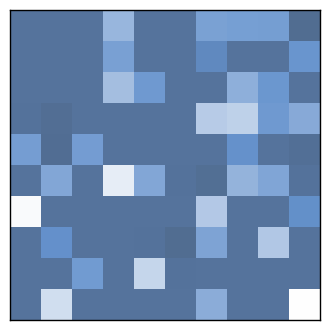

In [40]:
city = TransformingCity(10)
city.step()
city.array = city.rent_diff
viewer = RentViewer(city)
anim = viewer.animate()

In [41]:
print(city.array)

[[     0.              0.              0.         -13064.08373194      0.
       0.         -10972.80007723 -10375.89293729 -10257.44954878
    1564.15743801]
 [     0.              0.              0.         -10742.79426028      0.
       0.          -5532.78180766      0.              0.          -8402.46671749]
 [     0.              0.              0.         -13469.25205468
   -9283.58692098      0.              0.         -12690.27703786
   -8729.49862971      0.        ]
 [     0.           1039.87399294      0.              0.              0.
       0.         -14189.97298239 -14544.68488451  -9175.53383852
  -12441.17652156]
 [-10113.18954503   1266.35169745 -10002.24776876      0.              0.
       0.              0.          -7358.24557626      0.            871.09649016]
 [     0.         -12081.30847587      0.         -16023.31967249
  -12085.27024017      0.            960.30586878 -12885.07905414
  -11871.85521737      0.        ]
 [-16770.03246026      0.         

In [42]:
anim